## Part C — Comprehensive Analysis



Purpose: Hyperparameter analysis and model comparison (Logistic, Softmax, Neural Network) on MNIST. This notebook reuses code from Part A and Part B provided by the student.


## Instructions

This notebook expects the DataLoaders train_loader, val_loader, test_loader (flattened 28x28 -> 784) to be defined in the environment. It also uses the provided model implementations (Logistic, Softmax, CustomFeedforwardNN) and training helpers.

Run cells in order.

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import os , sys
## uncomment this if you are running on vs code
# sys.path.append(os.path.abspath("../"))
# from src.logisitc_manual import LogisticRegression
# from src.softmax_manual import SoftmaxRegression
# from src.nn_manual import *
# from src.data_preprocessing import *


# For reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [29]:
#comment if you are on vs code
from google.colab import files
uploaded = files.upload()


Saving __init__.py to __init__ (2).py
Saving data_preprocessing.py to data_preprocessing (2).py
Saving logisitc_manual.py to logisitc_manual (2).py
Saving nn_manual.py to nn_manual (2).py
Saving softmax_manual.py to softmax_manual (2).py


In [30]:
from logisitc_manual import LogisticRegression
from softmax_manual import SoftmaxRegression
from data_preprocessing import *
from nn_manual import *

# Data Loading and Preprocessing

### For Logisitc Regression (Class 0 vs 1)

In [31]:
binary_data = MNISTDataLoader(batch_size=32, binary=True, digits=(0, 1))
train_loader_bin, val_loader_bin, test_loader_bin = binary_data.get_loaders()

## For Softmax Regression and NN

In [32]:
multi_data = MNISTDataLoader(batch_size=32, binary=False)
train_loader, val_loader, test_loader = multi_data.get_loaders()

## C1 — Hyperparameter Analysis

### C1.1 Learning Rate Analysis



=== LR = 0.001 ===
Epoch 1/20 Train Loss: 1.9895 Train Acc: 0.3966 Val Loss: 1.6273 Val Acc: 0.6332
Epoch 2/20 Train Loss: 1.2881 Train Acc: 0.7206 Val Loss: 1.0034 Val Acc: 0.7883
Epoch 3/20 Train Loss: 0.8453 Train Acc: 0.8091 Val Loss: 0.7190 Val Acc: 0.8302
Epoch 4/20 Train Loss: 0.6492 Train Acc: 0.8409 Val Loss: 0.5865 Val Acc: 0.8540
Epoch 5/20 Train Loss: 0.5487 Train Acc: 0.8600 Val Loss: 0.5111 Val Acc: 0.8673
Epoch 6/20 Train Loss: 0.4875 Train Acc: 0.8716 Val Loss: 0.4625 Val Acc: 0.8787
Epoch 7/20 Train Loss: 0.4460 Train Acc: 0.8808 Val Loss: 0.4296 Val Acc: 0.8851
Epoch 8/20 Train Loss: 0.4159 Train Acc: 0.8879 Val Loss: 0.4031 Val Acc: 0.8918
Epoch 9/20 Train Loss: 0.3929 Train Acc: 0.8928 Val Loss: 0.3826 Val Acc: 0.8953
Epoch 10/20 Train Loss: 0.3747 Train Acc: 0.8972 Val Loss: 0.3671 Val Acc: 0.8995
Epoch 11/20 Train Loss: 0.3596 Train Acc: 0.9008 Val Loss: 0.3539 Val Acc: 0.9017
Epoch 12/20 Train Loss: 0.3469 Train Acc: 0.9035 Val Loss: 0.3420 Val Acc: 0.9037
Epoch

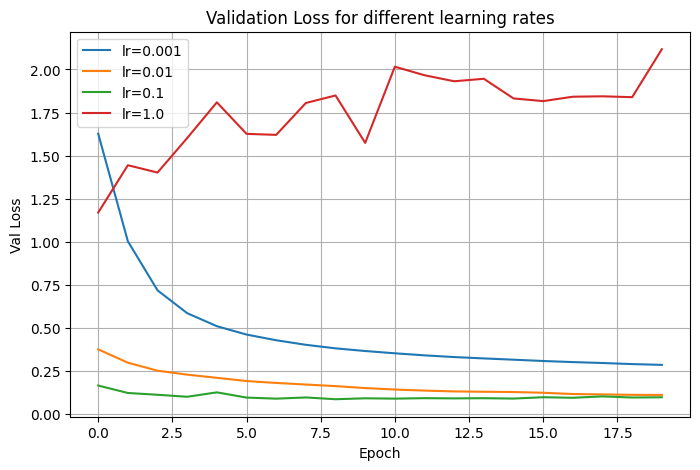

,lr,final_val_acc
0,0.001,0.918857
1,0.010,0.965714
2,0.100,0.978000
3,1.000,0.183357


In [33]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
num_epochs = 20
batch_size = 64
results_lr = []
for lr in learning_rates:
    print(f"\n=== LR = {lr} ===")
    # ensure we use DataLoaders with the chosen batch size
    # If your original train_loader has different batch size, recreate it from tensors if available
    # Here we assume train_loader and val_loader accept any batch sizes; if not, recreate from TensorDataset.
    model = CustomFeedforwardNN()
    tl, vl, ta, va = train_model_once(model, train_loader, val_loader, epochs=num_epochs, learning_rate=lr)
    results_lr.append({'lr': lr, 'train_losses': tl, 'val_losses': vl, 'train_acc': ta, 'val_acc': va})

# Plot validation loss comparison
plt.figure(figsize=(8,5))
for res in results_lr:
    plt.plot(res['val_losses'], label=f"lr={res['lr']}")
plt.xlabel('Epoch'); plt.ylabel('Val Loss'); plt.title('Validation Loss for different learning rates'); plt.legend(); plt.grid(True); plt.show()

# Summarize final val accuracy
pd.DataFrame([{'lr': r['lr'], 'final_val_acc': r['val_acc'][-1]} for r in results_lr])


### C1.2 Batch Size Analysis



=== Batch size = 16 ===
Epoch 1/20 Train Loss: 0.7588 Train Acc: 0.8030 Val Loss: 0.3768 Val Acc: 0.8924
Epoch 2/20 Train Loss: 0.3302 Train Acc: 0.9059 Val Loss: 0.3026 Val Acc: 0.9153
Epoch 3/20 Train Loss: 0.2754 Train Acc: 0.9218 Val Loss: 0.2610 Val Acc: 0.9269
Epoch 4/20 Train Loss: 0.2402 Train Acc: 0.9318 Val Loss: 0.2373 Val Acc: 0.9334
Epoch 5/20 Train Loss: 0.2138 Train Acc: 0.9398 Val Loss: 0.2142 Val Acc: 0.9392
Epoch 6/20 Train Loss: 0.1926 Train Acc: 0.9449 Val Loss: 0.1977 Val Acc: 0.9428
Epoch 7/20 Train Loss: 0.1749 Train Acc: 0.9503 Val Loss: 0.1815 Val Acc: 0.9479
Epoch 8/20 Train Loss: 0.1602 Train Acc: 0.9547 Val Loss: 0.1698 Val Acc: 0.9510
Epoch 9/20 Train Loss: 0.1478 Train Acc: 0.9580 Val Loss: 0.1615 Val Acc: 0.9544
Epoch 10/20 Train Loss: 0.1369 Train Acc: 0.9615 Val Loss: 0.1550 Val Acc: 0.9561
Epoch 11/20 Train Loss: 0.1274 Train Acc: 0.9640 Val Loss: 0.1471 Val Acc: 0.9576
Epoch 12/20 Train Loss: 0.1191 Train Acc: 0.9665 Val Loss: 0.1421 Val Acc: 0.9586


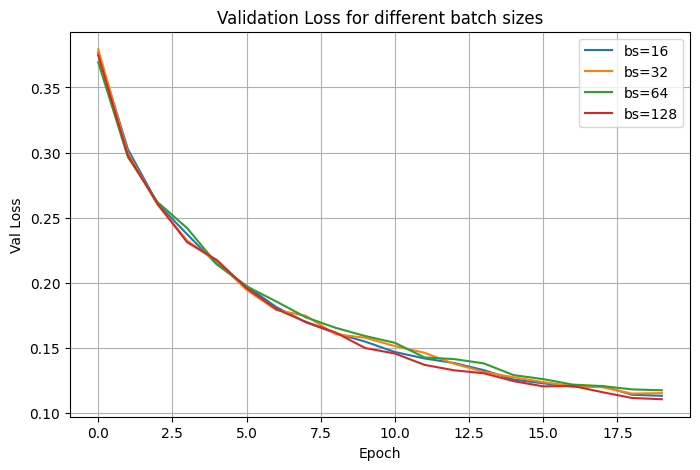

,batch_size,final_val_acc,time_s
0,16,0.965857,47.941267
1,32,0.966929,48.075384
2,64,0.964857,48.360015
3,128,0.966643,47.734964


In [34]:
batch_sizes = [16, 32, 64, 128]
num_epochs = 20
results_bs = []
# If tensors for X_train_flat etc exist, recreate DataLoaders with different batch sizes
try:
    X_train_flat
    recreate_loaders = True
except NameError:
    recreate_loaders = False

for bs in batch_sizes:
    print(f"\n=== Batch size = {bs} ===")
    if recreate_loaders:
        train_loader_bs = DataLoader(TensorDataset(X_train_flat, y_train), batch_size=bs, shuffle=True)
        val_loader_bs = DataLoader(TensorDataset(X_val_flat, y_val), batch_size=bs, shuffle=False)
    else:
        train_loader_bs = train_loader; val_loader_bs = val_loader
    model = CustomFeedforwardNN()
    start = time.time()
    tl, vl, ta, va = train_model_once(model, train_loader_bs, val_loader_bs, epochs=num_epochs, learning_rate=0.01)
    duration = time.time() - start
    results_bs.append({'bs': bs, 'train_losses': tl, 'val_losses': vl, 'train_acc': ta, 'val_acc': va, 'time_s': duration})

plt.figure(figsize=(8,5))
for res in results_bs:
    plt.plot(res['val_losses'], label=f"bs={res['bs']}")
plt.xlabel('Epoch'); plt.ylabel('Val Loss'); plt.title('Validation Loss for different batch sizes'); plt.legend(); plt.grid(True); plt.show()

pd.DataFrame([{'batch_size': r['bs'], 'final_val_acc': r['val_acc'][-1], 'time_s': r['time_s']} for r in results_bs])

### C1.3 Architecture Analysis


In [35]:
def make_ffnn(hidden_sizes):
    # hidden_sizes: list of ints
    if len(hidden_sizes) == 1:
        return CustomFeedforwardNN(input_size=784, hidden1_size=hidden_sizes[0], hidden2_size=64, output_size=10)
    elif len(hidden_sizes) == 2:
        return CustomFeedforwardNN(input_size=784, hidden1_size=hidden_sizes[0], hidden2_size=hidden_sizes[1], output_size=10)
    else:
        # for >2 layers create dynamic module
        class FFN_dynamic(nn.Module):
            def __init__(self, input_dim=784, hidden_sizes=[128,64], output_dim=10):
                super().__init__()
                layers = []
                prev = input_dim
                for h in hidden_sizes:
                    layers.append(nn.Linear(prev, h))
                    layers.append(nn.ReLU())
                    prev = h
                layers.append(nn.Linear(prev, output_dim))
                self.net = nn.Sequential(*layers)
                for m in self.net:
                    if isinstance(m, nn.Linear):
                        nn.init.xavier_uniform_(m.weight); nn.init.zeros_(m.bias)
            def forward(self, x):
                return self.net(x)
        return FFN_dynamic(input_dim=784, hidden_sizes=hidden_sizes, output_dim=10)

layers_options = [ [64,64], [128,64], [256,128,64], [512,256,128,64] ]
results_arch = []
for hidden in layers_options:
    print(f"\n=== Arch: {hidden} ===")
    model = make_ffnn(hidden)
    tl, vl, ta, va = train_model_once(model, train_loader, val_loader, epochs=20, learning_rate=0.01)
    results_arch.append({'hidden': hidden, 'train_acc': ta[-1], 'val_acc': va[-1], 'train_losses': tl, 'val_losses': vl})

pd.DataFrame([{'architecture': str(r['hidden']), 'train_acc': r['train_acc'], 'val_acc': r['val_acc']} for r in results_arch])



=== Arch: [64, 64] ===
Epoch 1/20 Train Loss: 0.8277 Train Acc: 0.7850 Val Loss: 0.4030 Val Acc: 0.8857
Epoch 2/20 Train Loss: 0.3497 Train Acc: 0.9003 Val Loss: 0.3132 Val Acc: 0.9115
Epoch 3/20 Train Loss: 0.2978 Train Acc: 0.9146 Val Loss: 0.2810 Val Acc: 0.9209
Epoch 4/20 Train Loss: 0.2665 Train Acc: 0.9227 Val Loss: 0.2605 Val Acc: 0.9260
Epoch 5/20 Train Loss: 0.2421 Train Acc: 0.9303 Val Loss: 0.2351 Val Acc: 0.9336
Epoch 6/20 Train Loss: 0.2216 Train Acc: 0.9355 Val Loss: 0.2228 Val Acc: 0.9378
Epoch 7/20 Train Loss: 0.2035 Train Acc: 0.9417 Val Loss: 0.2143 Val Acc: 0.9388
Epoch 8/20 Train Loss: 0.1887 Train Acc: 0.9461 Val Loss: 0.1946 Val Acc: 0.9436
Epoch 9/20 Train Loss: 0.1758 Train Acc: 0.9494 Val Loss: 0.1792 Val Acc: 0.9481
Epoch 10/20 Train Loss: 0.1649 Train Acc: 0.9534 Val Loss: 0.1739 Val Acc: 0.9496
Epoch 11/20 Train Loss: 0.1542 Train Acc: 0.9559 Val Loss: 0.1677 Val Acc: 0.9512
Epoch 12/20 Train Loss: 0.1461 Train Acc: 0.9587 Val Loss: 0.1578 Val Acc: 0.9533
E

,architecture,train_acc,val_acc
0,"[64, 64]",0.971190,0.960643
1,"[128, 64]",0.978571,0.966714
2,"[256, 128, 64]",0.991857,0.965357
3,"[512, 256, 128, 64]",0.997357,0.968143


## C2 — Model Comparison


In [36]:
# --- Softmax Regression (multiclass) ---
soft_model = SoftmaxRegression(input_dim=784, num_classes=10, learning_rate=0.1,max_epochs=50)
soft_model.fit(train_loader, val_loader)
#val_loss_soft, val_acc_soft = soft_model.evaluate(val_loader)
#print("Softmax val acc:", val_acc_soft)

# --- Neural Network: use best architecture ---
best_hidden = results_arch[1]['hidden'] if len(results_arch) > 1 else [128, 64]
best_model = make_ffnn(best_hidden)

start = time.time()
tl, vl, ta, va = train_model_once(best_model, train_loader, val_loader, epochs=30, learning_rate=0.01)
nn_time = time.time() - start

# --- Helper: NN Evaluation ---
def evaluate_nn_on_loader(model, loader):
    model.to(device)
    model.eval()
    correct, total = 0, 0
    y_true, y_pred = [], []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            correct += (preds.cpu() == y_batch).sum().item()
            total += y_batch.size(0)
    return correct / total, np.array(y_true), np.array(y_pred)

# --- Evaluate Softmax on test ---
soft_test_loss, soft_test_acc = soft_model.evaluate(test_loader)
print('Softmax test acc:', soft_test_acc)

# --- Evaluate NN on test ---
nn_test_acc, y_true_nn, y_pred_nn = evaluate_nn_on_loader(best_model, test_loader)
print('NN test acc:', nn_test_acc)

# --- Logistic Regression (binary) ---
# Only include if the dataset is binary
if len(set(y_train.numpy())) == 2:
    with torch.no_grad():
        test_loss_log = 0
        test_acc_log = 0
        n_batches = 0
        for X_batch, y_batch in test_loader:
            y_pred = forward_pass(X_batch, W, b)
            loss = binary_cross_entropy(y_pred, y_batch.unsqueeze(1))
            acc = compute_accuracy(y_pred, y_batch)
            test_loss_log += loss.item()
            test_acc_log += acc
            n_batches += 1
    log_test_loss = test_loss_log / n_batches
    log_test_acc = test_acc_log / n_batches
    print(f"Logistic Test Loss: {log_test_loss:.4f}, Test Accuracy: {log_test_acc:.4f}")
else:
    log_test_acc = float('nan')
    print("Skipping Logistic Regression (dataset is multi-class).")

# --- Final Comparison Table ---
comparison = pd.DataFrame([
    {'Model': 'Logistic Regression', 'Test Accuracy': float(log_test_acc), 'Training Time (s)': float('nan')},
    {'Model': 'Softmax Regression', 'Test Accuracy': float(soft_test_acc), 'Training Time (s)': float('nan')},
    {'Model': f'Neural Network {best_hidden}', 'Test Accuracy': float(nn_test_acc), 'Training Time (s)': nn_time}
])

display(comparison)


Epoch 10/50 - Train Loss: 0.2661, Train Acc: 0.9251 - Val Loss: 0.2825, Val Acc: 0.9232
Epoch 20/50 - Train Loss: 0.2521, Train Acc: 0.9297 - Val Loss: 0.2902, Val Acc: 0.9205

Early stopping triggered at epoch 27
Best validation loss: 0.2794 at epoch 17

Restored best model (Val Loss = 0.2794)
Epoch 1/30 Train Loss: 0.7341 Train Acc: 0.8082 Val Loss: 0.3736 Val Acc: 0.8934
Epoch 2/30 Train Loss: 0.3315 Train Acc: 0.9066 Val Loss: 0.3001 Val Acc: 0.9161
Epoch 3/30 Train Loss: 0.2780 Train Acc: 0.9204 Val Loss: 0.2671 Val Acc: 0.9262
Epoch 4/30 Train Loss: 0.2427 Train Acc: 0.9311 Val Loss: 0.2317 Val Acc: 0.9345
Epoch 5/30 Train Loss: 0.2152 Train Acc: 0.9388 Val Loss: 0.2126 Val Acc: 0.9388
Epoch 6/30 Train Loss: 0.1923 Train Acc: 0.9448 Val Loss: 0.1983 Val Acc: 0.9442
Epoch 7/30 Train Loss: 0.1737 Train Acc: 0.9515 Val Loss: 0.2157 Val Acc: 0.9342
Epoch 8/30 Train Loss: 0.1586 Train Acc: 0.9548 Val Loss: 0.1712 Val Acc: 0.9484
Epoch 9/30 Train Loss: 0.1461 Train Acc: 0.9594 Val Loss

,Model,Test Accuracy,Training Time (s)
0,Softmax Regression,NaN,NaN
1,"Neural Network [128, 64]",0.972571,72.963879


## C2.1 Confusion Matrix & Misclassified Examples (Best NN)


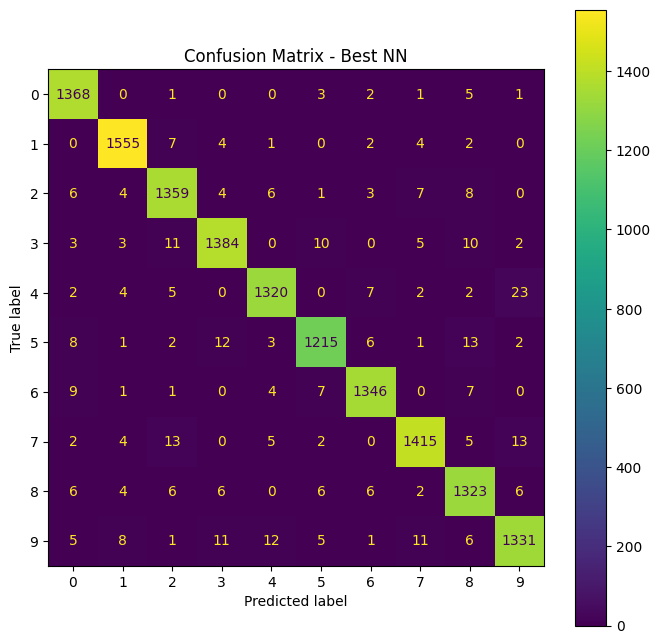

Total misclassified: 384


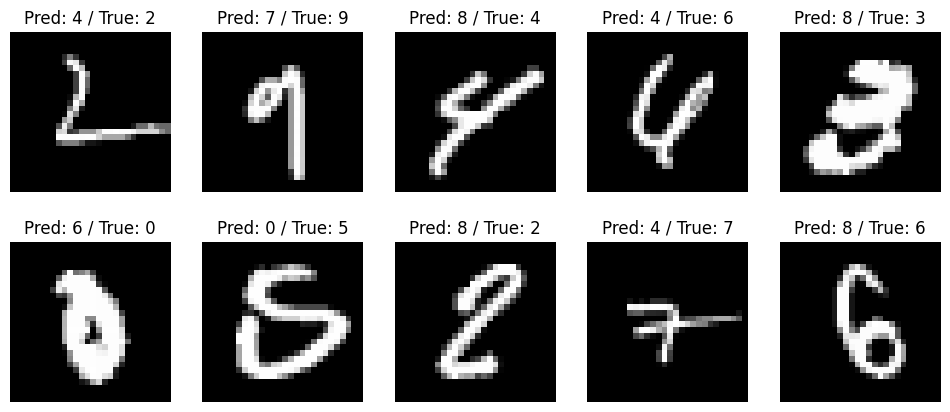

In [37]:
cm = confusion_matrix(y_true_nn, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax)
plt.title('Confusion Matrix - Best NN')
plt.show()

# Show some misclassified examples
mis_idx = np.where(y_true_nn != y_pred_nn)[0]
print('Total misclassified:', len(mis_idx))

# Grab images from test dataset (original test dataset should be available as X_test / y_test or test_loader.dataset)
# Assuming test_loader.dataset is a TensorDataset of flattened images

dataset_for_vis = test_loader.dataset
fig, axes = plt.subplots(2,5, figsize=(12,5))
for i, ax in enumerate(axes.flat):
    if i >= len(mis_idx): break
    idx = mis_idx[i]
    # if dataset stores flattened images, reshape
    img_flat, true_label = dataset_for_vis[idx]
    if img_flat.ndim == 1:
        img = img_flat.reshape(28,28)
    else:
        img = img_flat.squeeze()
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {y_pred_nn[idx]} / True: {y_true_nn[idx]}")
    ax.axis('off')
plt.show()

## C3 — Final Evaluation & Retraining Best Model on Train+Val


In [38]:
# Combine train + val into one dataset and retrain best model
try:
    X_train_flat; X_val_flat; y_train; y_val
    X_train_comb = torch.cat([X_train_flat, X_val_flat], dim=0)
    y_train_comb = torch.cat([y_train, y_val], dim=0)
    combined_loader = DataLoader(TensorDataset(X_train_comb, y_train_comb), batch_size=64, shuffle=True)
    final_model = make_ffnn(best_hidden)
    # train
    train_model_once(final_model, combined_loader, test_loader, epochs=30, learning_rate=0.01)
    final_acc, y_true_final, y_pred_final = evaluate_nn_on_loader(final_model, test_loader)
    print('Final test acc after retraining on train+val:', final_acc)
except NameError:
    print('Train/Val tensors not found in workspace; skip final retrain step or recreate tensors.')

Train/Val tensors not found in workspace; skip final retrain step or recreate tensors.


## Save results


In [39]:
# Save best model weights (optional)
try:
    torch.save(final_model.state_dict(), 'best_model_final.pt')
    print('Saved best_model_final.pt')
except NameError:
    print('Final model not trained — no file saved')

Final model not trained — no file saved


## End of Notebook